### Import neccessory modules


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# sklearn guys
from sklearn import linear_model, datasets, svm
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV , cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # for make custom clustering data
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

## Numpy

In [ ]:
# arange

a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [ ]:
np.arange(6,18,2)

array([ 6,  8, 10, 12, 14, 16])

In [ ]:
# 1d into 2d

a2 = a[np.newaxis, :]
a2

array([[0, 1, 2, 3, 4, 5]])

In [ ]:
# list to array

a3 = np.array([1,2,3,4])
a3

array([1, 2, 3, 4])

In [ ]:
# str array

np.array([1,2,3,4,5], dtype='str')

array(['1', '2', '3', '4', '5'], dtype='<U1')

In [ ]:
# array of zeros

a4 = np.zeros((5, 6))
a4

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
np.zeros(5, dtype='int')

array([0, 0, 0, 0, 0])

In [ ]:
# array of ones

a5 = np.ones(6)
a5

array([1., 1., 1., 1., 1., 1.])

In [ ]:
# an empty array

np.empty(5)

array([0., 0., 0., 0., 0.])

In [ ]:
# full of a value

np.full((2,3), 3.25)

array([[3.25, 3.25, 3.25],
       [3.25, 3.25, 3.25]])

In [ ]:
# create values which is evenly spaced between a range

np.linspace(0, 5, 12) # 12 values between 0 to 5

array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
       2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
       4.54545455, 5.        ])

In [ ]:
# with null values

a = np.array([1,2,3, np.nan])

In [ ]:
a

array([ 1.,  2.,  3., nan])

In [ ]:
np.sum(a)

nan

In [ ]:
np.nansum(a) # ignore all nan values

6.0

In [ ]:
# checking the efficiency of each fuctions

a1 = np.arange(1000)
%timeit sum(a1)
%timeit np.sum(a1)

120 µs ± 34.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
4.57 µs ± 405 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
# arg sort

a = np.array([1,5,3,22,5,0])
np.argsort(a)

array([5, 0, 2, 1, 4, 3])

In [ ]:
# random values

np.random.random((3,3))

array([[0.99784557, 0.40361401, 0.60330729],
       [0.32959466, 0.55965951, 0.25033775],
       [0.50846556, 0.33561478, 0.72158203]])

In [ ]:
# random choice

np.random.choice(a, 2)

array([3, 5])

In [ ]:
# normally distributed data

np.random.normal(0, 1, (3,3)) # 3x3 shape mean 0 and std 1

array([[ 1.78986565, -0.52711685,  1.14932357],
       [-0.48258831, -0.62056391, -0.3456385 ],
       [ 0.04239332,  0.83168462,  0.2359764 ]])

In [ ]:
# random values in an interval

np.random.randint(0, 10, (3,3))

array([[3, 5, 7],
       [4, 3, 2],
       [5, 8, 0]])

In [ ]:
# identity matrix

np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# normal sort

a.sort()
a

array([ 0,  1,  3,  5,  5, 22])

In [ ]:
a.ndim  # check diemention

1

In [ ]:
a.shape  # check the shape

(6,)

In [ ]:
a.dtype  # check the data type

dtype('int64')

In [ ]:
a.nbytes   # check total bytes

48

In [ ]:
a.size  # check the size or len

6

In [ ]:
a.itemsize  # size of each element in the array

8

In [ ]:
a.reshape(1, 1, -1)   # reshaping

array([[[ 0,  1,  3,  5,  5, 22]]])

In [ ]:
# another way of reshaping

a2  = a[np.newaxis, :]
a2

array([[ 0,  1,  3,  5,  5, 22]])

In [ ]:
a2.flags # some attributes

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [ ]:
a2.base

array([ 0,  1,  3,  5,  5, 22])

In [ ]:
a.real  # real part

array([ 0,  1,  3,  5,  5, 22])

In [ ]:
a.imag  # imaginary part if exist

array([0, 0, 0, 0, 0, 0])

In [ ]:
a2.ravel()  # flattening

array([ 0,  1,  3,  5,  5, 22])

In [ ]:
a2.ptp()   # max - min

22

In [ ]:
a2.cumsum()   # cumulative sum

array([ 0,  1,  4,  9, 14, 36])

In [ ]:
a2.clip(3, 5)  # changing values below and abow the range that specify

array([[3, 3, 3, 5, 5, 5]])

**Indexing**

In [ ]:
x = np.arange(0, 101 ,10)
x

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [ ]:
x[0]

0

In [ ]:
x[-2]

90

In [ ]:
# in multi diementional array

x2 = np.random.randint(1, 10, size=(3,3))
x2

array([[1, 4, 4],
       [4, 3, 1],
       [5, 8, 8]])

In [ ]:
x2[2,1]

8

In [ ]:
x2[-1, -3]

5

In [ ]:
# modify values

x2[0,0] = 9
x2

array([[9, 4, 4],
       [4, 3, 1],
       [5, 8, 8]])

**Array slicing**

In [ ]:
x

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [ ]:
x[:5] # first five

array([ 0, 10, 20, 30, 40])

In [ ]:
x[2:6] # in the middle

array([20, 30, 40, 50])

In [ ]:
x[::2]  # even indexes

array([  0,  20,  40,  60,  80, 100])

In [ ]:
x[-7:-2:2]

array([40, 60, 80])

In [ ]:
# reversed

x[::-1]

array([100,  90,  80,  70,  60,  50,  40,  30,  20,  10,   0])

In [ ]:
# in 2d array

x2

array([[9, 4, 4],
       [4, 3, 1],
       [5, 8, 8]])

In [ ]:
x2[:2, :2]

array([[9, 4],
       [4, 3]])

In [ ]:
x2[:3, ::2]

array([[9, 4],
       [4, 1],
       [5, 8]])

In [ ]:
# reversed all

x2[::-1, ::-1]

array([[8, 8, 5],
       [1, 3, 4],
       [4, 4, 9]])

In [ ]:
x2[:, 0] # access first col of x2

array([9, 4, 5])

In [ ]:
x2[0, :]  # access first row of x2

array([9, 4, 4])

**subaray is no copy views**

In [ ]:
x2

array([[9, 4, 4],
       [4, 3, 1],
       [5, 8, 8]])

In [ ]:
x2_sub = x2[:2, :2]
x2_sub

array([[9, 4],
       [4, 3]])

In [ ]:
x2_sub[0, 0] = 100
x2_sub

array([[100,   4],
       [  4,   3]])

In [ ]:
x2 # values in x2 is also changed

array([[100,   4,   4],
       [  4,   3,   1],
       [  5,   8,   8]])

**create copy of array**

In [ ]:
x2_sub_array = x2[:2,:2].copy()
x2_sub_array

array([[100,   4],
       [  4,   3]])

In [ ]:
# modifying the sub array

x2_sub_array[0, 0] = 9
x2_sub_array

array([[9, 4],
       [4, 3]])

In [ ]:
x2 # changes are not in x2

array([[100,   4,   4],
       [  4,   3,   1],
       [  5,   8,   8]])

In [ ]:
# array concat

x = np.array([1,2,3,4])
y = np.array([5,6,7,8])

np.concatenate((x, y))

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# more than 2 arrays

z = np.array([99,98,97])
np.concatenate((x, y, z))

array([ 1,  2,  3,  4,  5,  6,  7,  8, 99, 98, 97])

In [ ]:
# concat in 2d array

grid = np.random.randint(1,10, size=(2,3))
grid

array([[7, 7, 4],
       [8, 8, 8]])

In [ ]:
np.concatenate((grid, grid))

array([[7, 7, 4],
       [8, 8, 8],
       [7, 7, 4],
       [8, 8, 8]])

In [ ]:
np.concatenate((grid, grid), axis=1) # changed the axis to column

array([[7, 7, 4, 7, 7, 4],
       [8, 8, 8, 8, 8, 8]])

In [ ]:
# vertical stacking

x = np.array([1,2,3])
grid = np.array([[9,8,7],
                 [6,5,4]])

np.vstack((x, grid))

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [ ]:
# horizontal stacking

y = np.array([
    [99],
    [99]
])

np.hstack((grid, y))

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

In [ ]:
# splitting arrays

x = np.arange(1,100, 5)
print('x : ', x)

x1, x2, x3 = np.split(x, [3,5]) # splitting at break before 3rd index and 5th index

print('x1 : ', x1)
print('x2 : ', x2)
print('x3 : ', x3)

x :  [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96]
x1 :  [ 1  6 11]
x2 :  [16 21]
x3 :  [26 31 36 41 46 51 56 61 66 71 76 81 86 91 96]


In [ ]:
# splitting in 2d

grid = np.arange(6*6).reshape(6,6)
grid

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [ ]:
# v split

upper, lower = np.vsplit(grid, [2])

print('upper : \n', upper, sep='\n')
print('\nlower : \n', lower, sep='\n')

upper : 

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]

lower : 

[[12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]


In [ ]:
# h split

left , right = np.hsplit(grid, 2)

print('left : \n', left, sep='\n')
print('\nright : \n', right, sep='\n')

left : 

[[ 0  1  2]
 [ 6  7  8]
 [12 13 14]
 [18 19 20]
 [24 25 26]
 [30 31 32]]

right : 

[[ 3  4  5]
 [ 9 10 11]
 [15 16 17]
 [21 22 23]
 [27 28 29]
 [33 34 35]]


**Coputation on np array**

In [ ]:
x = np.arange(4)
print("x =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2) # floor division
print("-x = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2 = ", x % 2)

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2 =  [0 1 0 1]


In [ ]:
# a use case

(-(0.5*x+1))**2

array([1.  , 2.25, 4.  , 6.25])

In [ ]:
# same things in another way : u func

print(np.add(x,2)) #Addition +
print(np.subtract(x,5)) #Subtraction -
print(np.negative(x)) #Unary negation -
print(np.multiply(x,3)) #Multiplication *
print(np.divide(x,2)) #Division /
print(np.floor_divide(x,2)) #Floor division //
print(np.power(x,2)) #Exponentiation **
print(np.mod(x,2)) #Modulus/remainder **
print(np.multiply(x, x))

[2 3 4 5]
[-5 -4 -3 -2]
[ 0 -1 -2 -3]
[0 3 6 9]
[0.  0.5 1.  1.5]
[0 0 1 1]
[0 1 4 9]
[0 1 0 1]
[0 1 4 9]


In [ ]:
np.abs(x)  # absolute

array([0, 1, 2, 3])

In [ ]:
# Trigenometry

theta = np.linspace(0,np.pi,3) # the angles

print("theta      =",theta)
print("sin(theta) =",np.sin(theta))
print("cos(theta) =",np.cos(theta))
print("tan(theta) =",np.tan(theta))

theta      = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [ ]:
# exponents

x = [1,2,3]
print("x      =",x)
print("e^x    =",np.exp(x))
print("2^x    =",np.exp2(x))
print("3^x    =",np.power(3,x))

x      = [1, 2, 3]
e^x    = [ 2.71828183  7.3890561  20.08553692]
2^x    = [2. 4. 8.]
3^x    = [ 3  9 27]


In [ ]:
# logarithm

x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


**Use case of U func**

In [ ]:
# out parameter

x = np.arange(5)
y = np.empty(5) # random values

np.multiply(x, 10, out=y) # x will be multiplied by 10 and save that to y

y

array([ 0., 10., 20., 30., 40.])

In [ ]:
y = np.zeros(10)
np.power(2, x, out=y[::2])

y

array([ 1.,  0.,  2.,  0.,  4.,  0.,  8.,  0., 16.,  0.])

In [ ]:
# the same

y = np.zeros(10)
y[::2] = 2 ** x

y

array([ 1.,  0.,  2.,  0.,  4.,  0.,  8.,  0., 16.,  0.])

In [ ]:
# aggregations

x = np.arange(1,6)
x

array([1, 2, 3, 4, 5])

In [ ]:
# reduce

np.add.reduce(x)

15

In [ ]:
np.subtract.reduce(x)

-13

In [ ]:
np.multiply.reduce(x)

120

In [ ]:
# accumulated values
# store all the intermediate results of the computation

print(np.add.accumulate(x))
print(np.subtract.accumulate(x))
print(np.multiply.accumulate(x))
print(np.divide.accumulate(x))
print(np.floor_divide.accumulate(x))

[ 1  3  6 10 15]
[  1  -1  -4  -8 -13]
[  1   2   6  24 120]
[1.         0.5        0.16666667 0.04166667 0.00833333]
[1 0 0 0 0]


In [ ]:
# outer product

x = np.arange(1,6,2)  # [1,3,5]
np.multiply.outer(x, x)

# new matrix where each elem in row is multiplied by evey element

array([[ 1,  3,  5],
       [ 3,  9, 15],
       [ 5, 15, 25]])

**broadcasting**

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

In [ ]:
# example 1

M = np.ones((2,3))
a = np.arange(3)

print('M : ', M, sep='\n', end='\n\n')
print('a : ', a, sep='\n', end='\n\n')

M+a

M : 
[[1. 1. 1.]
 [1. 1. 1.]]

a : 
[0 1 2]



array([[1., 2., 3.],
       [1., 2., 3.]])

In [ ]:
# example 2

a = np.arange(3).reshape((3,1))
b = np.arange(3)

print('a : ', a, sep='\n', end='\n\n')
print('b : ', b, sep='\n', end='\n\n')

a+b

a : 
[[0]
 [1]
 [2]]

b : 
[0 1 2]



array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [ ]:
# example 3

M = np.ones((3,2))
a = np.arange(3)

print('M : ', M, sep='\n', end='\n\n')
print('a : ', a, sep='\n', end='\n\n')

# M+a  #ERROR !!

M : 
[[1. 1.]
 [1. 1.]
 [1. 1.]]

a : 
[0 1 2]



**Comparison**

In [ ]:
x = np.array([1,2,3,4,5])

print(x<3)  # less than
print(x>3)  # greater than
print(x<=3) #less than or equal
print(x>=3) #greater than or equal
print(x!=3) #not equal
print(x==3) #equal

[ True  True False False False]
[False False False  True  True]
[ True  True  True False False]
[False False  True  True  True]
[ True  True False  True  True]
[False False  True False False]


In [ ]:
# some awesome things

(2*x) == (2**x)

array([ True,  True, False, False, False])

In [ ]:
# in multi diemention

x = np.random.randint(10, size=(3,4))
print(x, end='\n\n')

x<6

[[7 4 3 3]
 [4 7 2 5]
 [1 6 4 2]]



array([[False,  True,  True,  True],
       [ True, False,  True,  True],
       [ True, False,  True,  True]])

In [ ]:
# working with boolean arrays

np.count_nonzero(x<6)

9

In [ ]:
np.sum(x<6) # the same as count non zero in boolean array

9

**some questions**

In [ ]:
# how many values less than 6 in each row?
print(np.sum(x < 6, axis=1))

# how many values less than 6 in each column?
print(np.sum(x < 6, axis=0))

[3 3 3]
[2 1 3 3]


In [ ]:
# are there any values greater than 8?
print(np.any(x>8))

# are there any values less than zero?
print(np.any(x<0))

# are all values less than 10?
print(np.all(x<10))

# are all values equal to 6?
print(np.all(x==6))

False
False
True
False


In [ ]:
# are all values in each row less than 8?
print(np.all(x<8, axis=1))

# are all values in each column less than 3?
print(np.all(x<3, axis=0))

[ True  True  True]
[False False False False]


In [ ]:
# or

A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)

A | B

array([ True,  True,  True, False,  True,  True])

In [ ]:
# and

x = np.arange(11)

(x>4) & (x<8)

array([False, False, False, False, False,  True,  True,  True, False,
       False, False])

**Fancy Indexing**

In [ ]:
x = np.random.randint(100, size=10)

x

array([18, 25, 26,  1, 35, 64, 86, 69, 76, 92])

In [ ]:
[x[3], x[7], x[2]]

[1, 69, 26]

In [ ]:
ind = [3,7,2]
x[ind]

array([ 1, 69, 26])

In [ ]:
ind = np.array([[3,7],
                [4,5]])

x[ind]

array([[ 1, 69],
       [35, 64]])

In [ ]:
# in 2d arrays

x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

x[row , col]

array([ 2,  5, 11])

In [ ]:
# combined indexing

print('x : ', x, sep='\n', end='\n\n')

x[2, [2, 0, 1]]

x : 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]



array([10,  8,  9])

In [ ]:
x[1: , [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [ ]:
# masking

mask = np.array([1, 0, 1, 0], dtype=bool)
x[:, mask] # get first and 3rd column

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [ ]:
# modifying

x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99

x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [ ]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [ ]:
x = np.zeros(10)
x[[0, 2]] = [4, 6]
x

array([4., 0., 6., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([4., 0., 7., 1., 1., 0., 0., 0., 0., 0.])

In [ ]:
# another way

x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

**Sorting in 2d**

In [ ]:
x = np.random.randint(0, 10, (4, 6))
x

array([[9, 3, 3, 2, 4, 7],
       [8, 1, 9, 8, 7, 7],
       [4, 9, 7, 4, 9, 4],
       [1, 7, 7, 8, 4, 0]])

In [ ]:
# sort each row of X

np.sort(x, axis=0)

array([[1, 1, 3, 2, 4, 0],
       [4, 3, 7, 4, 4, 4],
       [8, 7, 7, 8, 7, 7],
       [9, 9, 9, 8, 9, 7]])

In [ ]:
# sort each row of X

np.sort(x, axis=1) # default axis=1 , no need to specify

array([[2, 3, 3, 4, 7, 9],
       [1, 7, 7, 8, 8, 9],
       [4, 4, 4, 7, 9, 9],
       [0, 1, 4, 7, 7, 8]])

## Pandas

In [ ]:
# version
pd.__version__

'1.5.3'

**Series** : Labeled 1d array in pandas

In [ ]:
# creating an array

s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])
s

a    3
b   -5
c    7
d    4
dtype: int64

In [ ]:
s[1:] # slicing

b   -5
c    7
d    4
dtype: int64

In [ ]:
s['a']

3

In [ ]:
s[:'c']

a    3
b   -5
c    7
dtype: int64

In [ ]:
s.index # get indexes

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
s.array # convert to 'pandas array'

<PandasArray>
[3, -5, 7, 4]
Length: 4, dtype: int64

In [ ]:
s.to_numpy() # to numpy

array([ 3, -5,  7,  4])

In [ ]:
s.values # to numpy

array([ 3, -5,  7,  4])

In [ ]:
s.dtype  # data type of each values

dtype('int64')

In [ ]:
s.shape # get shape

(4,)

In [ ]:
# to create copy

s_copy = s.copy(deep=True)
s_copy

a    3
b   -5
c    7
d    4
dtype: int64

In [ ]:
s.to_list() # to list

[3, -5, 7, 4]

**Data Frame** : 2d data with labeled axes (rows and columns)

In [ ]:
# creating a data frame

data = {'Country': ['Belgium', 'India', 'Brazil'],
 'Capital': ['Brussels', 'New Delhi', 'Brasília'],
 'Population': [11190846, 1303171035, 207847528]}

pd.DataFrame(data)

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [ ]:
# another way to create df

array = np.array([
    [1,2,3,4],
    [5,6,7,8],
    [9,8,7,6]
])

pd.DataFrame(array, columns=['column-a', 'column-b', 'column-c', 'column-d'])

,column-a,column-b,column-c,column-d
0,1,2,3,4
1,5,6,7,8
2,9,8,7,6


In [ ]:
# from a csv file

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
# get first few rows

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# get some sample rows

df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8194,-118.44,34.26,34.0,325.0,60.0,433.0,83.0,5.5124,174300.0
2004,-117.31,33.11,7.0,7974.0,1703.0,2904.0,1550.0,4.1282,188100.0
9242,-119.08,35.39,10.0,6435.0,1040.0,3242.0,1030.0,5.5750,132200.0
12998,-121.85,37.27,17.0,1957.0,261.0,863.0,269.0,7.3339,294200.0
8238,-118.44,34.02,37.0,1592.0,308.0,783.0,321.0,6.2583,386000.0


In [ ]:
# get some last row

df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [ ]:
# get the columns

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
# get the index

df.index

RangeIndex(start=0, stop=17000, step=1)

In [ ]:
# get the shape of data

df.shape

(17000, 9)

In [ ]:
# get data type of each column

df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [ ]:
df.values # df as numpy format

array([[-1.1431e+02,  3.4190e+01,  1.5000e+01, ...,  4.7200e+02,
         1.4936e+00,  6.6900e+04],
       [-1.1447e+02,  3.4400e+01,  1.9000e+01, ...,  4.6300e+02,
         1.8200e+00,  8.0100e+04],
       [-1.1456e+02,  3.3690e+01,  1.7000e+01, ...,  1.1700e+02,
         1.6509e+00,  8.5700e+04],
       ...,
       [-1.2430e+02,  4.1840e+01,  1.7000e+01, ...,  4.5600e+02,
         3.0313e+00,  1.0360e+05],
       [-1.2430e+02,  4.1800e+01,  1.9000e+01, ...,  4.7800e+02,
         1.9797e+00,  8.5800e+04],
       [-1.2435e+02,  4.0540e+01,  5.2000e+01, ...,  2.7000e+02,
         3.0147e+00,  9.4600e+04]])

In [ ]:
df.nunique()  # unique values in each columns

longitude               827
latitude                840
housing_median_age       52
total_rooms            5533
total_bedrooms         1848
population             3683
households             1740
median_income         11175
median_house_value     3694
dtype: int64

In [ ]:
df.info()   # some info about df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.describe() # for numerical values

# df.describe(include=['O])  # use this for non-numeric data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum()  # count of na values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
df.longitude   # get a col as series

0       -114.31
1       -114.47
2       -114.56
3       -114.57
4       -114.57
          ...  
16995   -124.26
16996   -124.27
16997   -124.30
16998   -124.30
16999   -124.35
Name: longitude, Length: 17000, dtype: float64

In [ ]:
df['longitude']  # get a col as series

0       -114.31
1       -114.47
2       -114.56
3       -114.57
4       -114.57
          ...  
16995   -124.26
16996   -124.27
16997   -124.30
16998   -124.30
16999   -124.35
Name: longitude, Length: 17000, dtype: float64

In [ ]:
df[['longitude']]  # get a row as data frame

,longitude
0,-114.31
1,-114.47
2,-114.56
3,-114.57
4,-114.57
...,...
16995,-124.26
16996,-124.27
16997,-124.30
16998,-124.30


In [ ]:
df.longitude.values # a column as an array

array([-114.31, -114.47, -114.56, ..., -124.3 , -124.3 , -124.35])

In [ ]:
# indexing

df.iloc[0, 4]  # 0 row, 4 column

1283.0

In [ ]:
# slicing

df.iloc[1:4, 2:6]

,housing_median_age,total_rooms,total_bedrooms,population
1,19.0,7650.0,1901.0,1129.0
2,17.0,720.0,174.0,333.0
3,14.0,1501.0,337.0,515.0


In [ ]:
# loc - based on label name of column

df.loc[1:3, 'longitude':'total_rooms']

,longitude,latitude,housing_median_age,total_rooms
1,-114.47,34.40,19.0,7650.0
2,-114.56,33.69,17.0,720.0
3,-114.57,33.64,14.0,1501.0


In [ ]:
df.loc[2, ['longitude', 'total_rooms']]

longitude     -114.56
total_rooms    720.00
Name: 2, dtype: float64

In [ ]:
# boolean indexing

high_housing = (df.housing_median_age>30) | (df.total_rooms>df.total_rooms.mean())
high_housing

0         True
1         True
2        False
3        False
4        False
         ...  
16995     True
16996     True
16997     True
16998     True
16999     True
Length: 17000, dtype: bool

In [ ]:
df[high_housing] # applying that to df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
# querying

df.query('total_rooms > total_bedrooms+50')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
# filter

df.filter(items=['total_rooms', 'total_bedrooms'])

,total_rooms,total_bedrooms
0,5612.0,1283.0
1,7650.0,1901.0
2,720.0,174.0
3,1501.0,337.0
4,1454.0,326.0
...,...,...
16995,2217.0,394.0
16996,2349.0,528.0
16997,2677.0,531.0
16998,2672.0,552.0


In [ ]:
# filter only 0 and 5 row index

df.filter(items=[0, 5], axis=0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0


In [ ]:
df.filter(like='ooms', axis=1) # can use regex also

,total_rooms,total_bedrooms
0,5612.0,1283.0
1,7650.0,1901.0
2,720.0,174.0
3,1501.0,337.0
4,1454.0,326.0
...,...,...
16995,2217.0,394.0
16996,2349.0,528.0
16997,2677.0,531.0
16998,2672.0,552.0


In [ ]:
# isin (for series)

df[df.total_bedrooms.isin([337, 174])].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
56,-115.52,32.77,18.0,1715.0,337.0,1166.0,333.0,2.2417,79200.0
1282,-117.15,34.22,10.0,1039.0,174.0,317.0,109.0,7.2371,171900.0
1547,-117.21,32.74,52.0,1245.0,174.0,468.0,193.0,6.9322,334500.0


In [ ]:
# set index

df.set_index('longitude')

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,,,,,,,,
-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...
-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0


In [ ]:
# set multiple index

df.set_index(['longitude', 'latitude'])

housing_median_age  total_rooms  total_bedrooms  \
longitude latitude                                                    
-114.31   34.19                   15.0       5612.0          1283.0   
-114.47   34.40                   19.0       7650.0          1901.0   
-114.56   33.69                   17.0        720.0           174.0   
-114.57   33.64                   14.0       1501.0           337.0   
          33.57                   20.0       1454.0           326.0   
...                                ...          ...             ...   
-124.26   40.58                   52.0       2217.0           394.0   
-124.27   40.69                   36.0       2349.0           528.0   
-124.30   41.84                   17.0       2677.0           531.0   
          41.80                   19.0       2672.0           552.0   
-124.35   40.54                   52.0       1820.0           300.0   

                    population  households  median_income  median_house_value  
longitude latitude                                                             
-114.31   34.19         1015.0       472.0         1.4936             66900.0  
-114.47   34.40         1129.0       463.0         1.8200             80100.0  
-114.56   33.69          333.0       117.0         1.6509             85700.0  
-114.57   33.64          515.0       226.0         3.1917             73400.0  
          33.57          624.0       262.0         1.9250             65500.0  
...                        ...         ...            ...                 ...  
-124.26   40.58          907.0       369.0         2.3571            111400.0  
-124.27   40.69         1194.0       465.0         2.5179             79000.0  
-124.30   41.84         1244.0       456.0         3.0313            103600.0  
          41.80         1298.0       478.0         1.9797             85800.0  
-124.35   40.54          806.0       270.0         3.0147             94600.0  

[17000 rows x 7 columns]

In [ ]:
# resetiing index

df.reset_index()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...,...
16995,16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
# rename colmns

df.rename(columns={'latitude': 'LAtiTUde'})

,longitude,LAtiTUde,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
# using mapper functions in rename

df.rename(mapper=str.upper, axis=1)

,LONGITUDE,LATITUDE,HOUSING_MEDIAN_AGE,TOTAL_ROOMS,TOTAL_BEDROOMS,POPULATION,HOUSEHOLDS,MEDIAN_INCOME,MEDIAN_HOUSE_VALUE
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
# duplicate data

df.latitude.unique()[:10]

array([34.19, 34.4 , 33.69, 33.64, 33.57, 33.63, 33.61, 34.83, 33.62,
       33.6 ])

In [ ]:
# drop duplicate

df.loc[:, ['total_rooms','total_bedrooms' ]].drop_duplicates()

,total_rooms,total_bedrooms
0,5612.0,1283.0
1,7650.0,1901.0
2,720.0,174.0
3,1501.0,337.0
4,1454.0,326.0
...,...,...
16995,2217.0,394.0
16996,2349.0,528.0
16997,2677.0,531.0
16998,2672.0,552.0


In [ ]:
# grouping data

df.groupby(by=['total_rooms']).count()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
total_rooms,,,,,,,,
2.0,1,1,1,1,1,1,1,1
8.0,1,1,1,1,1,1,1,1
11.0,1,1,1,1,1,1,1,1
12.0,1,1,1,1,1,1,1,1
15.0,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
30401.0,1,1,1,1,1,1,1,1
30405.0,1,1,1,1,1,1,1,1
32054.0,1,1,1,1,1,1,1,1


In [ ]:
!wget -O train.csv "https://drive.google.com/uc?export=download&id=18BkN8aj76sQg40xuTfrehGrwh_J6Xfd0"

--2023-10-03 04:53:55--  https://drive.google.com/uc?export=download&id=18BkN8aj76sQg40xuTfrehGrwh_J6Xfd0
Resolving drive.google.com (drive.google.com)... 64.233.187.101, 64.233.187.138, 64.233.187.102, ...
Connecting to drive.google.com (drive.google.com)|64.233.187.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/70vvqdmruqh043o3hsae1p7mo5nov34k/1696308825000/15644515695012050515/*/18BkN8aj76sQg40xuTfrehGrwh_J6Xfd0?e=download&uuid=72360280-c604-4552-a8a2-48254c8f38c1 [following]
--2023-10-03 04:53:56--  https://doc-0k-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/70vvqdmruqh043o3hsae1p7mo5nov34k/1696308825000/15644515695012050515/*/18BkN8aj76sQg40xuTfrehGrwh_J6Xfd0?e=download&uuid=72360280-c604-4552-a8a2-48254c8f38c1
Resolving doc-0k-0g-docs.googleusercontent.com (doc-0k-0g-docs.googleusercontent.com)... 142.251.170.132, 2404

In [ ]:
# another data

df1 = pd.read_csv('/content/train.csv')

In [ ]:
df1.shape

(891, 12)

In [ ]:
# drop na

df1.dropna(how='any').shape # after drop the rows that contain any null values

(183, 12)

In [ ]:
df1.dropna(how='all').shape # # after drop the rows that contain all null values

(891, 12)

In [ ]:
# fill na

df1.fillna(df.mean())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data = np.array([
    [1,2],
    [2,np.nan],
    [np.nan, 4],
    [4, 5]
])
data = pd.DataFrame(data, columns=['a', 'b'])
data

,a,b
0,1.0,2.0
1,2.0,NaN
2,NaN,4.0
3,4.0,5.0


In [ ]:
values = {'a':1, 'b':2}
data.fillna(value=values)

,a,b
0,1.0,2.0
1,2.0,2.0
2,1.0,4.0
3,4.0,5.0


In [ ]:
# combining data

data1 = pd.DataFrame({'x1': list('abc'), 'x2': [11.432, 1.303, 99.906]})
data2 = pd.DataFrame({'x1': list('abd'), 'x3': [20.784,  np.NaN, 20.784]})

data1

,x1,x2
0,a,11.432
1,b,1.303
2,c,99.906


In [ ]:
data2

,x1,x3
0,a,20.784
1,b,NaN
2,d,20.784


In [ ]:
# inner join (like sql)

data1.merge(data2, how='inner', on='x1')

,x1,x2,x3
0,a,11.432,20.784
1,b,1.303,NaN


In [ ]:
# outer join

data1.merge(data2, how='outer', on='x1')

,x1,x2,x3
0,a,11.432,20.784
1,b,1.303,NaN
2,c,99.906,NaN
3,d,NaN,20.784


In [ ]:
# concatenate

pd.concat([data1, data2], axis=0, ignore_index=True)

,x1,x2,x3
0,a,11.432,NaN
1,b,1.303,NaN
2,c,99.906,NaN
3,a,NaN,20.784
4,b,NaN,NaN
5,d,NaN,20.784


In [ ]:
# add a new row

data2.loc[3] = ['g', 500]
data2

,x1,x3
0,a,20.784
1,b,NaN
2,d,20.784
3,g,500.000


In [ ]:
# date formatting

pd.to_datetime('2018-2-19')

Timestamp('2018-02-19 00:00:00')

In [ ]:
# date range

pd.date_range('2018-4-18', periods=6, freq='d')

DatetimeIndex(['2018-04-18', '2018-04-19', '2018-04-20', '2018-04-21',
               '2018-04-22', '2018-04-23'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# reshape data

df1.pivot(index='Sex', columns='PassengerId', values='Age')

PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Sex,,,,,,,,,,,,,,,,,,,,,
female,NaN,38.0,26.0,35.0,NaN,NaN,NaN,NaN,27.0,14.0,...,NaN,22.0,NaN,NaN,39.0,NaN,19.0,NaN,NaN,NaN
male,22.0,NaN,NaN,NaN,35.0,NaN,54.0,2.0,NaN,NaN,...,33.0,NaN,28.0,25.0,NaN,27.0,NaN,NaN,26.0,32.0


In [ ]:
df.stack() # convert whole df into 1 long format of series

0      longitude              -114.3100
       latitude                 34.1900
       housing_median_age       15.0000
       total_rooms            5612.0000
       total_bedrooms         1283.0000
                                ...    
16999  total_bedrooms          300.0000
       population              806.0000
       households              270.0000
       median_income             3.0147
       median_house_value    94600.0000
Length: 153000, dtype: float64

In [ ]:
# apply

def f(x):
  return x ** 3

df1.Fare.apply(f)

0         381.078125
1      362212.463781
2         497.734578
3      149721.291000
4         521.660125
           ...      
886      2197.000000
887     27000.000000
888     12895.213625
889     27000.000000
890       465.484375
Name: Fare, Length: 891, dtype: float64

In [ ]:
# apply map

df.applymap(f) # for the entire data frame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.493663e+06,39966.609059,3375.0,1.767474e+11,2.111932e+09,1.045678e+09,105154048.0,3.331984,2.994183e+14
1,-1.499944e+06,40707.584000,6859.0,4.476971e+11,6.869836e+09,1.439070e+09,99252847.0,6.028568,5.139224e+14
2,-1.503485e+06,38238.692409,4913.0,3.732480e+08,5.268024e+06,3.692604e+07,1601613.0,4.499480,6.294228e+14
3,-1.503878e+06,38068.692544,2744.0,3.381755e+09,3.827275e+07,1.365909e+08,11543176.0,32.513685,3.954469e+14
4,-1.503878e+06,37831.540293,8000.0,3.073925e+09,3.464598e+07,2.429706e+08,17984728.0,7.133328,2.810114e+14
...,...,...,...,...,...,...,...,...,...
16995,-1.918642e+06,66824.563112,140608.0,1.089675e+10,6.116298e+07,7.461426e+08,50243409.0,13.095860,1.382470e+15
16996,-1.919106e+06,67369.460509,46656.0,1.296131e+10,1.471980e+08,1.702209e+09,100544625.0,15.963034,4.930390e+14
16997,-1.920496e+06,73244.501504,4913.0,1.918426e+10,1.497213e+08,1.925135e+09,94818816.0,27.853948,1.111935e+15
16998,-1.920496e+06,73034.632000,6859.0,1.907697e+10,1.681966e+08,2.186876e+09,109215352.0,7.758864,6.316287e+14


<Axes: xlabel='median_income', ylabel='median_house_value'>

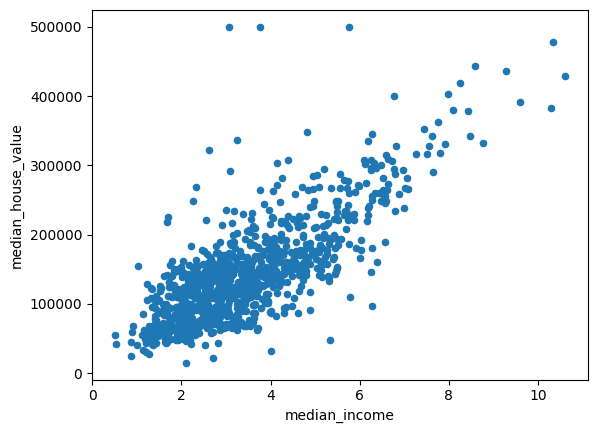

In [ ]:
df[['median_income', 'median_house_value']][:1000].plot(kind='scatter', x='median_income', y='median_house_value')

**working with text**

In [ ]:
# convert all rows to lower

df1.Name.str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [ ]:
df1.Name.str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [ ]:
df1.Name.str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [ ]:
# splitting the text

df1.Name.str.split(pat=',', expand=True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


In [ ]:
# differenciating first name and last name

df1.Name.str.split(pat=',', expand=True).rename(columns={0: 'First_name', 1:'Last_name'})

,First_name,Last_name
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


In [ ]:
# splitting but not expanding

df1.Name.str.split(expand=False)

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object

In [ ]:
# replace in str

df1.Name.str.replace('Mr.', '')

<ipython-input-203-9552ecca3323>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1.Name.str.replace('Mr.', '')


0                                  Braund,  Owen Harris
1      Cumings, . John Bradley (Florence Briggs Thayer)
2                                Heikkinen, Miss. Laina
3             Futrelle, . Jacques Heath (Lily May Peel)
4                                 Allen,  William Henry
                             ...                       
886                               Montvila, Rev. Juozas
887                        Graham, Miss. Margaret Edith
888            Johnston, Miss. Catherine Helen "Carrie"
889                                  Behr,  Karl Howell
890                                    Dooley,  Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
# extract just last name

df1.Name.str.extract('(?P<Last_Name>[a-zA-Z]+)', expand=True).head()

,Last_Name
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen


## Matplotlib

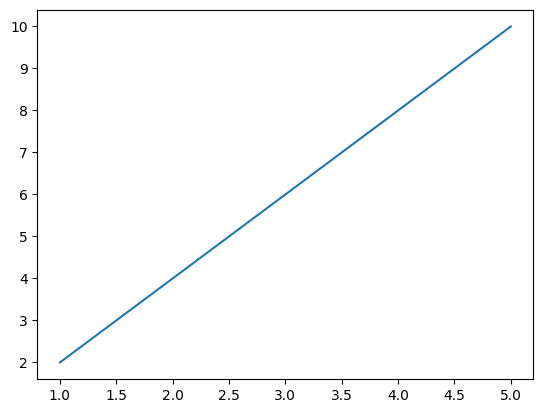

In [ ]:
# simple plotting

X = [1,2,3,4,5]
y = [2,4,6,8,10]

plt.plot(X, y)
plt.show()

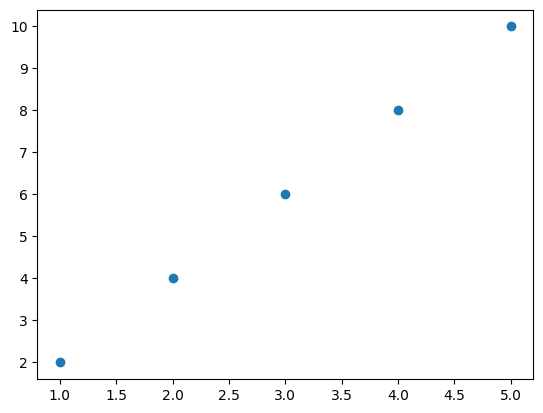

In [ ]:
# scatter plot

plt.scatter(X, y)
plt.show()

<BarContainer object of 4 artists>

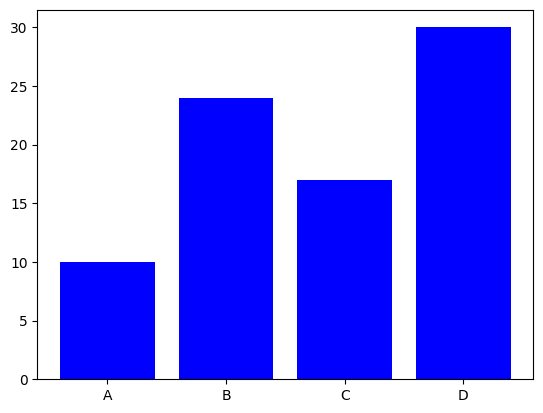

In [ ]:
# bar chart

categories = ['A', 'B', 'C', 'D']
values = [10, 24, 17, 30]

plt.bar(categories, values, color='blue')

<BarContainer object of 4 artists>

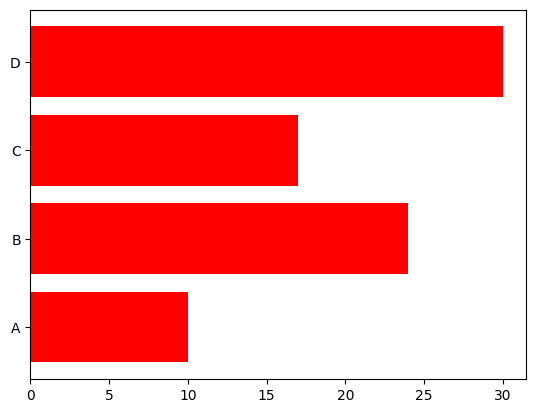

In [ ]:
# horizontal barchart

plt.barh(categories, values, color='Red')

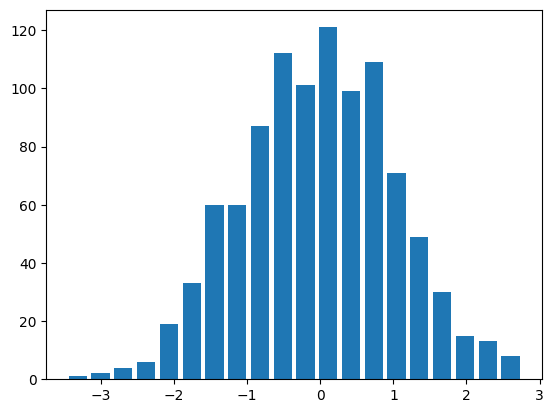

In [ ]:
# histogram

data = np.random.randn(1000)  # generate data

plt.hist(data, bins=20, rwidth=0.8)
plt.show()

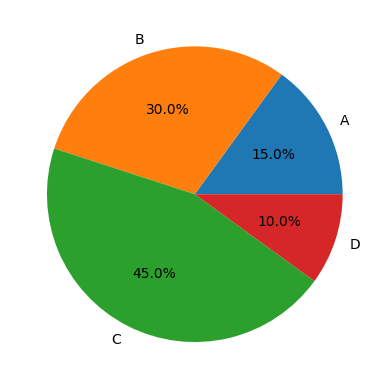

In [ ]:
# pie chart

labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

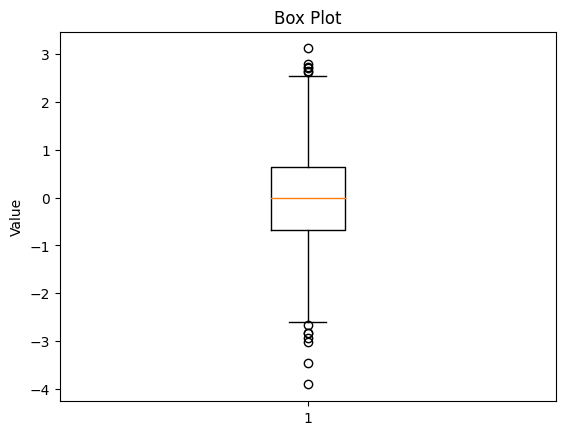

In [ ]:
# box plot

data = np.random.randn(1000)

plt.boxplot(data)
plt.ylabel('Value')
plt.title('Box Plot')
plt.show()

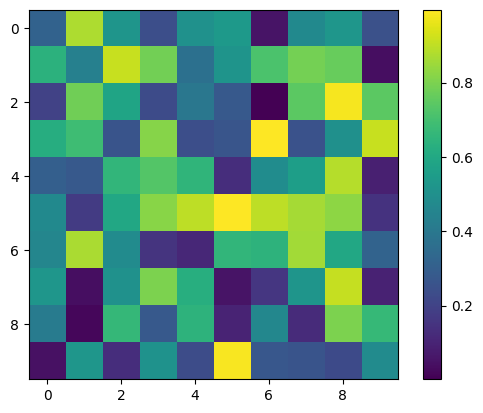

In [ ]:
# color map

data = np.random.rand(10, 10) #random 2x2 matrix
plt.imshow(data)
plt.colorbar()

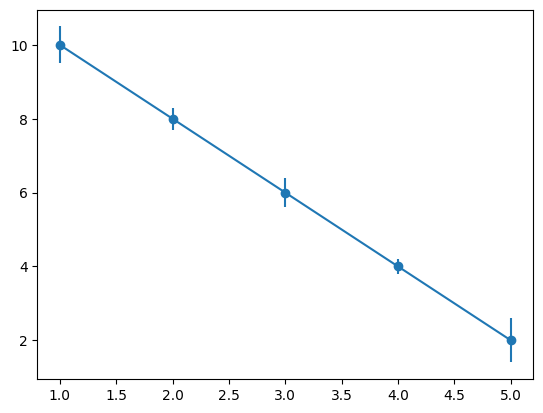

In [ ]:
# error bar

x = [1 , 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]
y_err = [0.5, 0.3, 0.4, 0.2, 0.6]

plt.errorbar(x, y, yerr=y_err, fmt='o-')
plt.show()

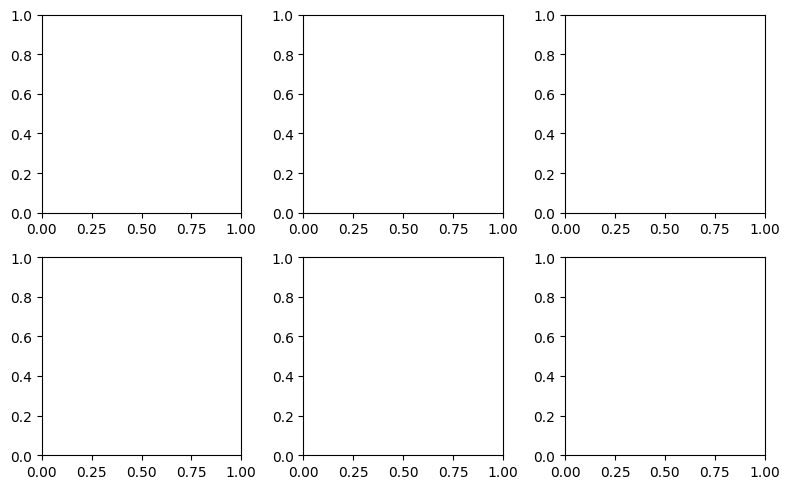

In [ ]:
# alighnment

fig, axes = plt.subplots(2,3, figsize=(8, 5))
plt.tight_layout()

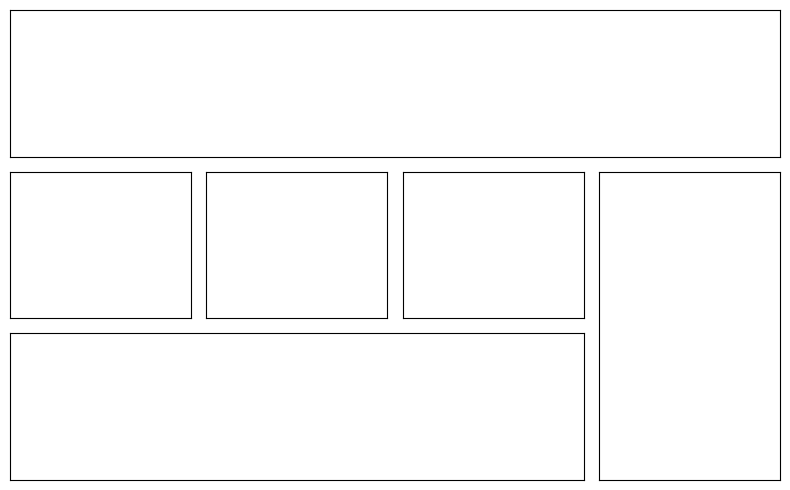

In [ ]:
# with subplot2grid

fig = plt.figure(figsize=(8, 5)) # initialize figure

ax = [None for _ in range(6)]

ax[0] = plt.subplot2grid((3, 4), (0, 0), colspan=4)
ax[1] = plt.subplot2grid((3, 4), (1, 0), colspan=1)
ax[2] = plt.subplot2grid((3, 4), (1, 1), colspan=1)
ax[3] = plt.subplot2grid((3, 4), (1, 2), colspan=1)
ax[4] = plt.subplot2grid((3, 4), (1, 3), colspan=1, rowspan=2)
ax[5] = plt.subplot2grid((3, 4), (2, 0), colspan=3)

for i in range(6):
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()

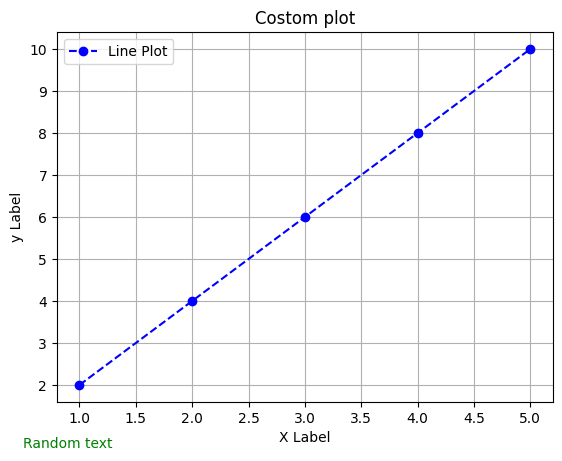

In [ ]:
# customise plots

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y, label='Line Plot', color='blue', linestyle='--', marker='o')

#labels
plt.text(0.5, 0.5, 'Random text', fontsize=10, color='green')
plt.xlabel('X Label')
plt.ylabel('y Label')
plt.title('Costom plot')

plt.legend() #show the name of each data point
plt.grid(True) #enable grid

(0.0, 20.0)

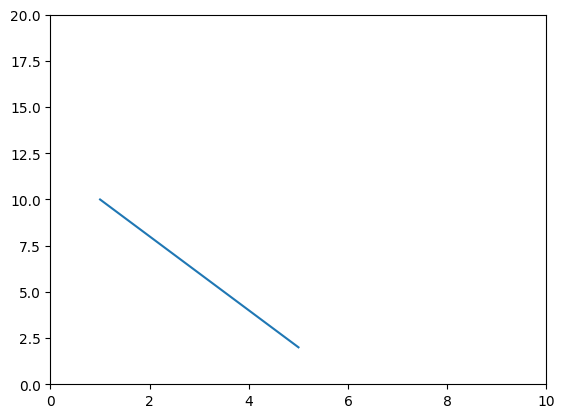

In [ ]:
#limits

x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]

plt.plot(x, y)

plt.xlim(0, 10) #x axis limit
plt.ylim(0, 20) #y axis limit

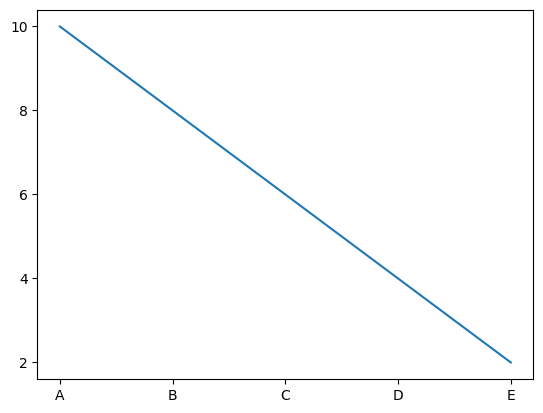

In [ ]:
# set ticks

x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]

plt.plot(x, y)

x_ticks = [1, 2, 3, 4, 5]
x_tick_labels = ['A', 'B', 'C', 'D', 'E']
y_ticks = [2, 4, 6, 8, 10]

plt.xticks(x_ticks, x_tick_labels)  # X-axis custom ticks and labels
plt.yticks(y_ticks)  # Y-axis custom ticks

plt.show()

In [ ]:
# save the figure

plt.savefig('plot.png')

<Figure size 640x480 with 0 Axes>

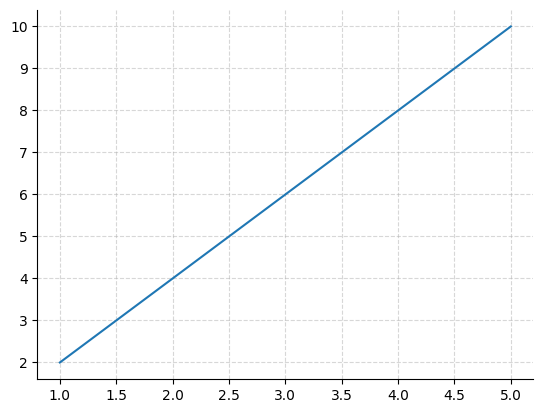

In [ ]:
# grid and spine

x = [1,2,3,4,5]
y = [2,4,6,8,10]

plt.plot(x, y)

plt.grid(True, linestyle='--', alpha=0.5)
ax = plt.gca()
ax.spines['top'].set_visible(False) # dont show top border
ax.spines['right'].set_visible(False)

plt.show()

Text(3, 6, 'Here it is')

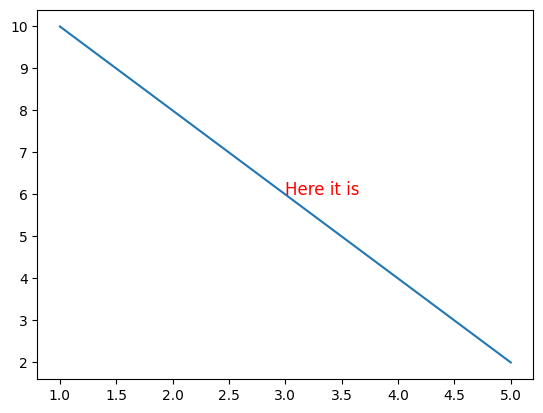

In [ ]:
# annotate

x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]

plt.plot(x, y)

plt.text(3,6, 'Here it is', fontsize=12, color='red')

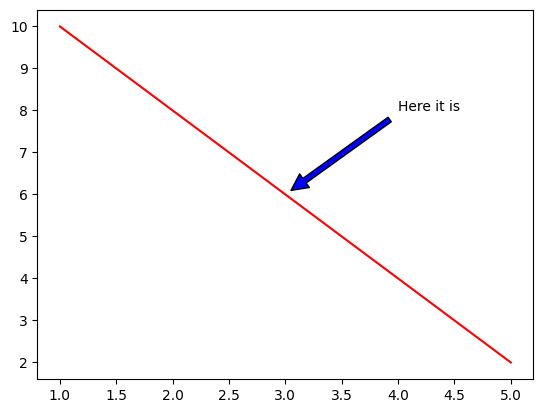

In [ ]:
# arrow annotate

x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]

plt.plot(x, y, color='red')

plt.annotate('Here it is', xy=(3,6), xytext=(4, 8),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

## Seaborn

In [ ]:
# importing data set from seaborn

crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


[]

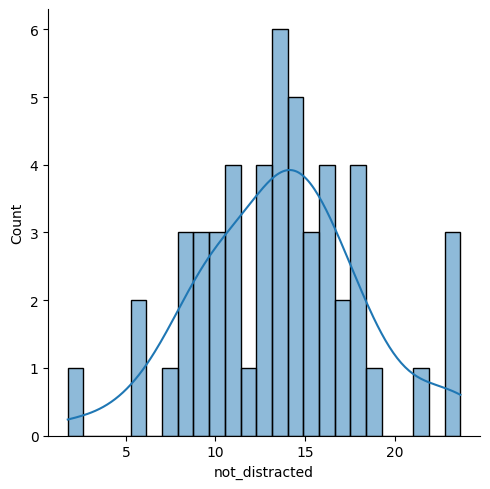

In [ ]:
# distribution plot

sns.displot(crash_df['not_distracted'],kde=True,  bins=25)
plt.plot()

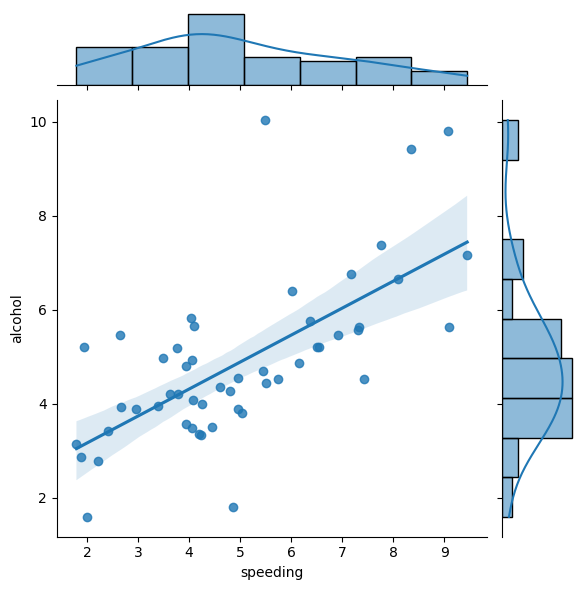

In [ ]:
# joint plot (for multi variate)

sns.jointplot(x='speeding', y = 'alcohol', data=crash_df, kind='reg')

<Axes: xlabel='alcohol', ylabel='Density'>

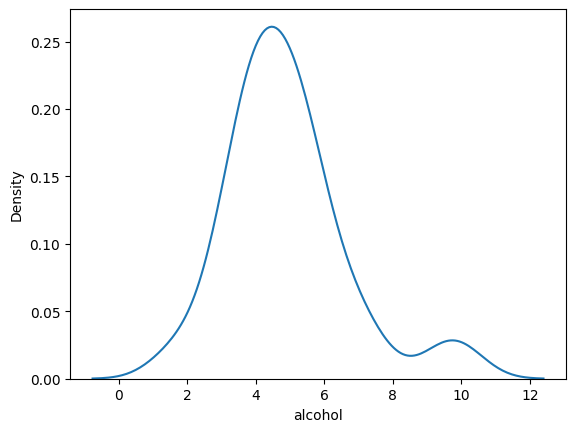

In [ ]:
# kde plot

sns.kdeplot(crash_df['alcohol'])

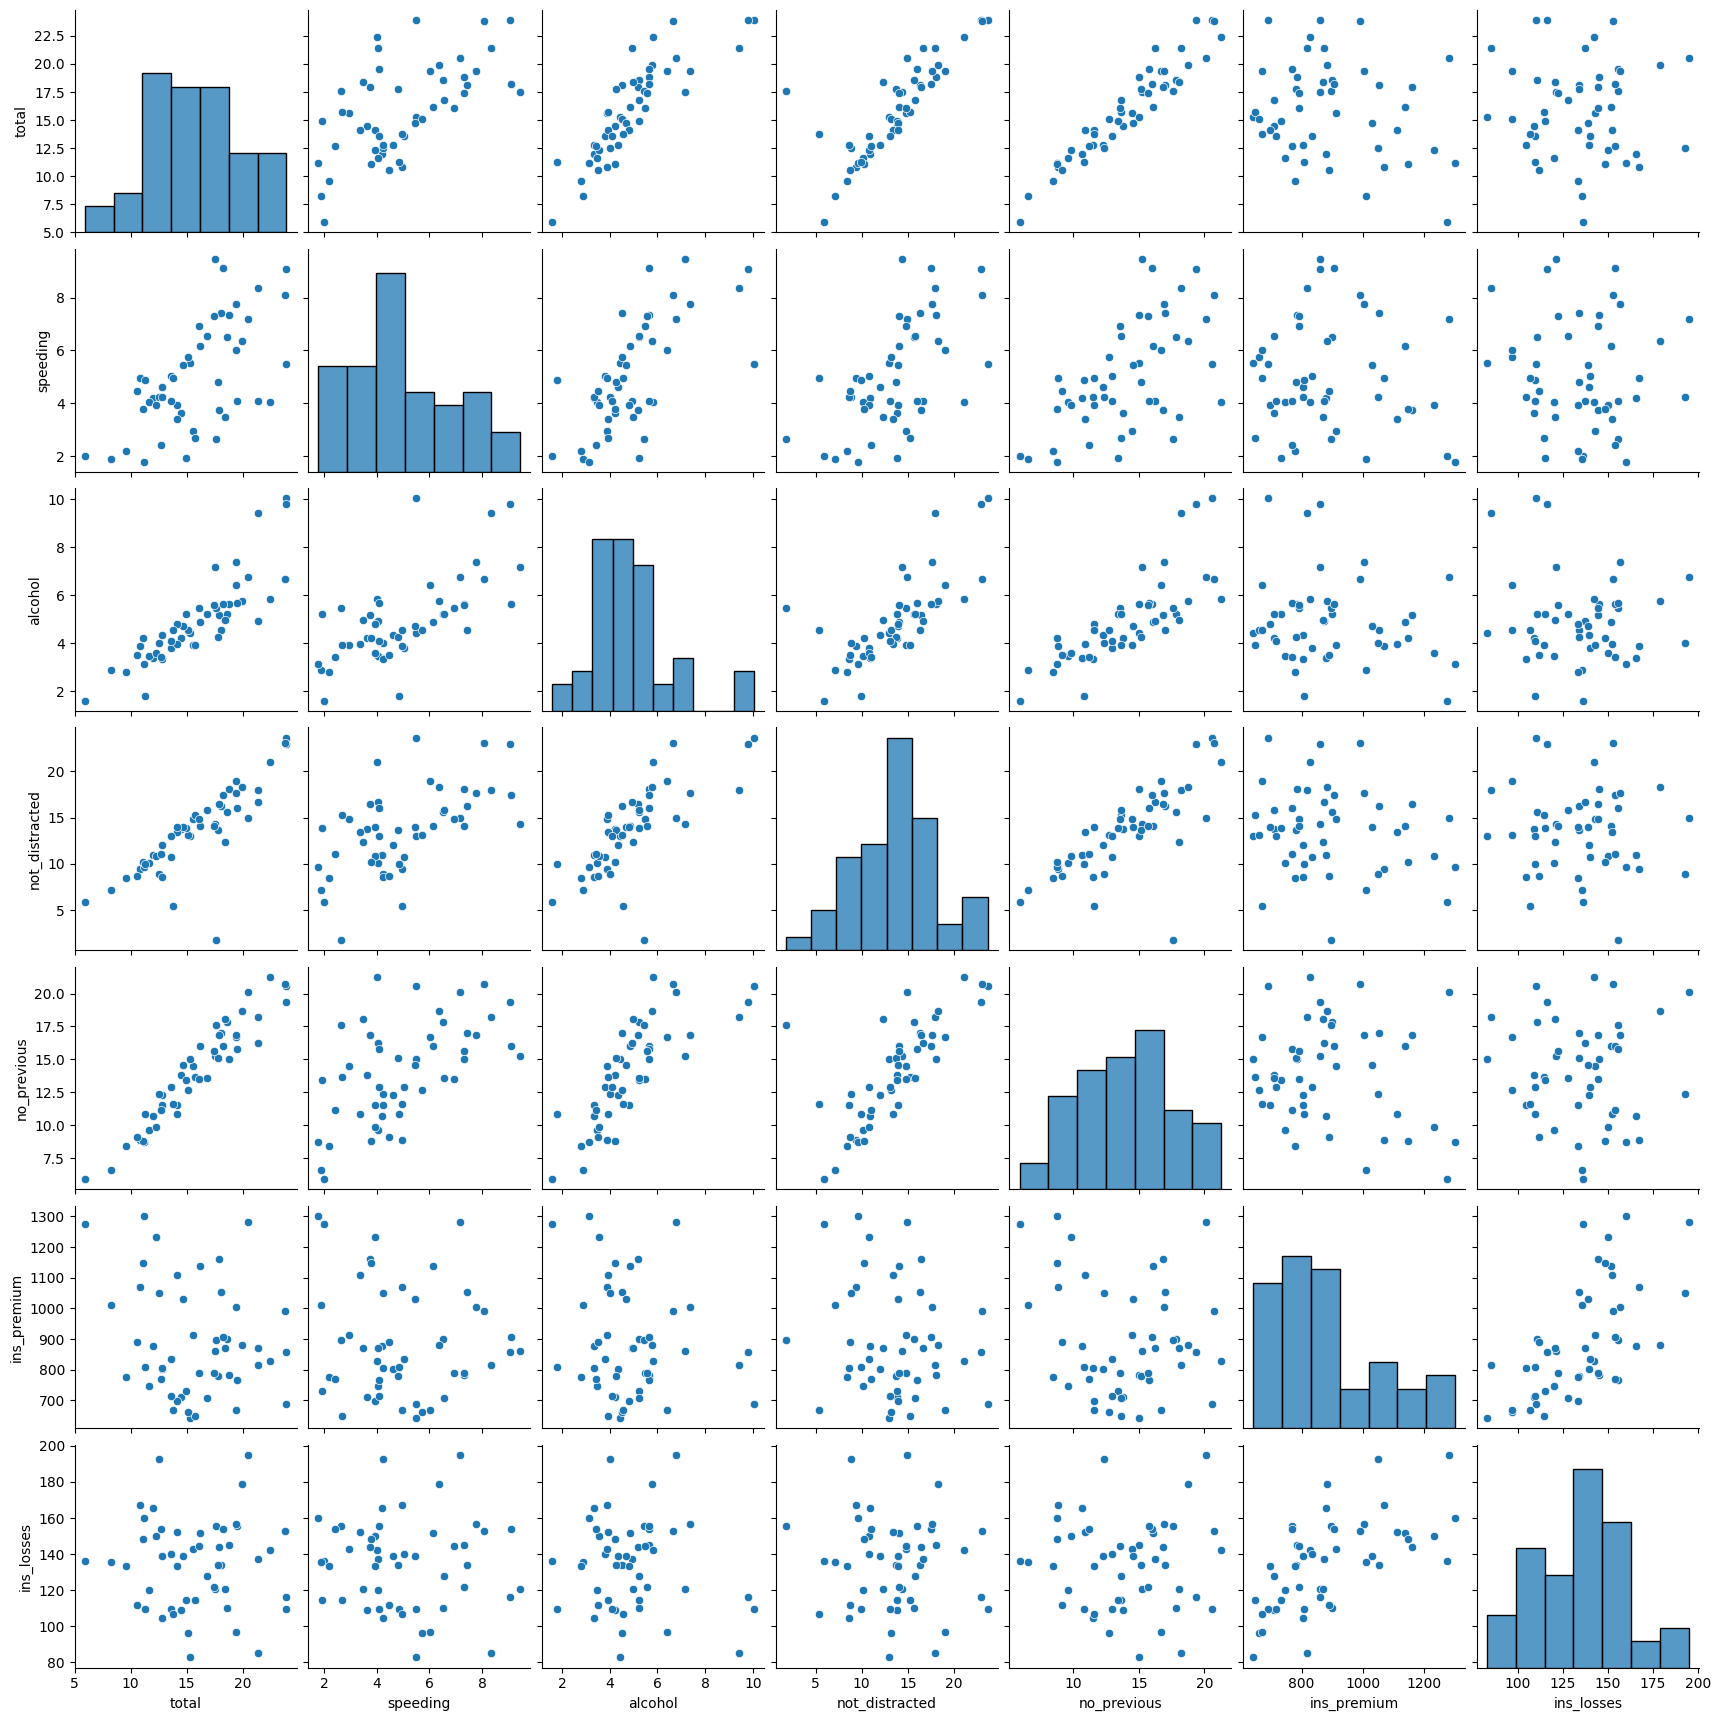

In [ ]:
# paiplot (multi variate)

sns.pairplot(crash_df)

In [ ]:
# load the data on tips

tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


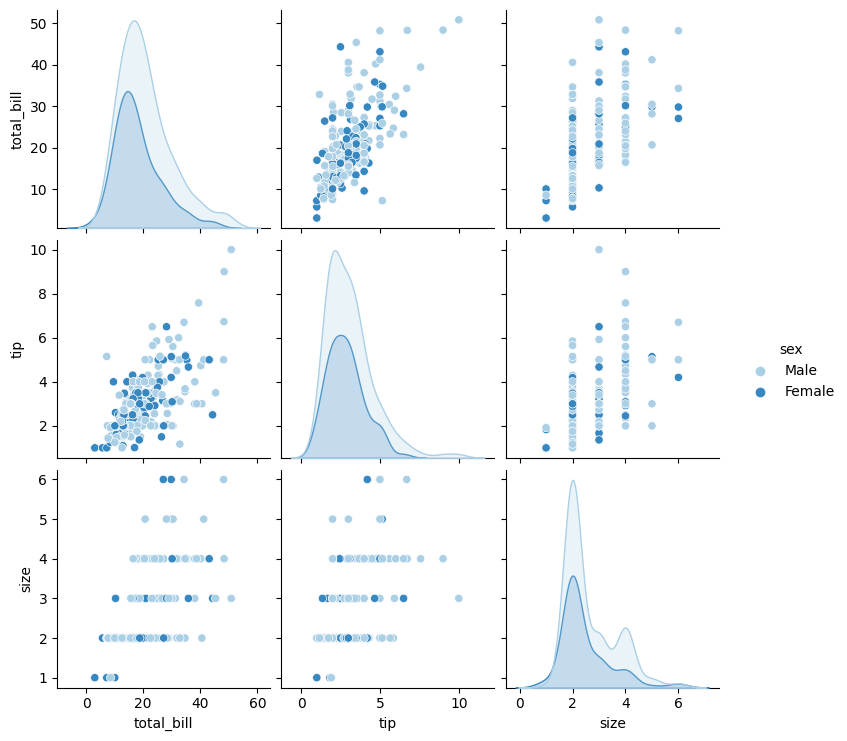

In [ ]:
# categorial data in pair plot with hue

sns.pairplot(tips_df, hue='sex', palette='Blues')

<Axes: xlabel='sex', ylabel='total_bill'>

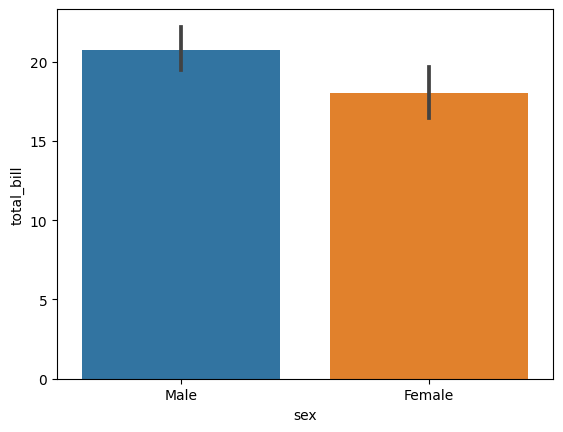

In [ ]:
# bar plot

sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.mean)

<Axes: xlabel='sex', ylabel='count'>

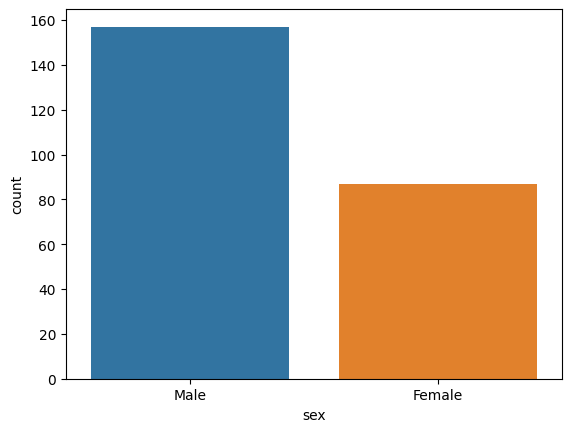

In [ ]:
# count plot

sns.countplot(x = 'sex', data=tips_df)

<Axes: xlabel='day', ylabel='total_bill'>

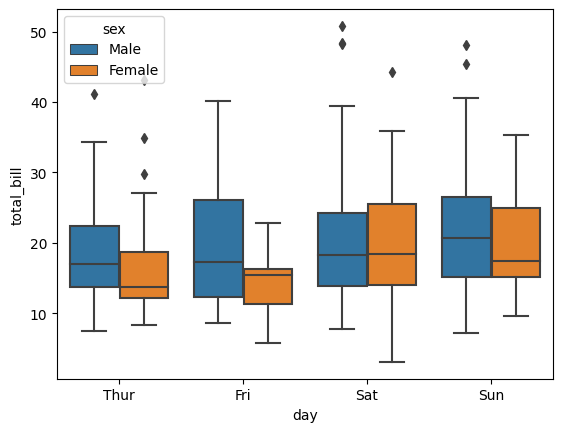

In [ ]:
# box plot

sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

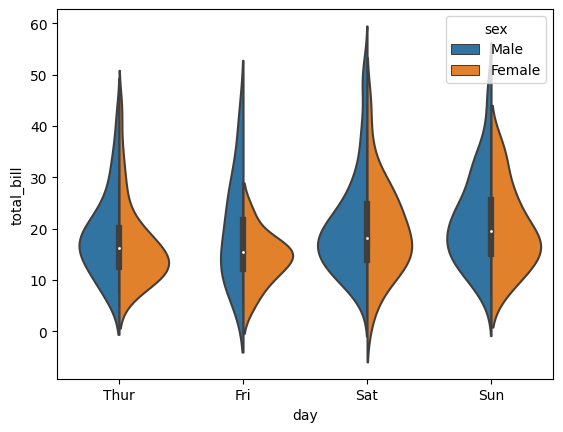

In [ ]:
# violine plot

sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

In [ ]:
# heatmap

crash_mx = crash_df.corr(numeric_only=True)
crash_mx

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<Axes: >

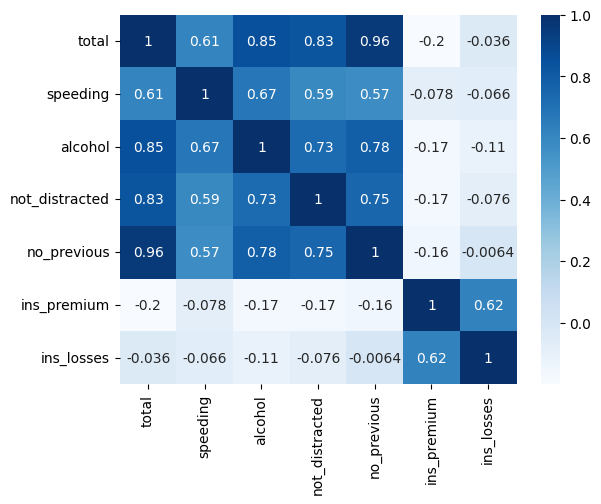

In [ ]:
sns.heatmap(crash_mx, annot=True, cmap='Blues')

In [ ]:
# load another dataset

iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


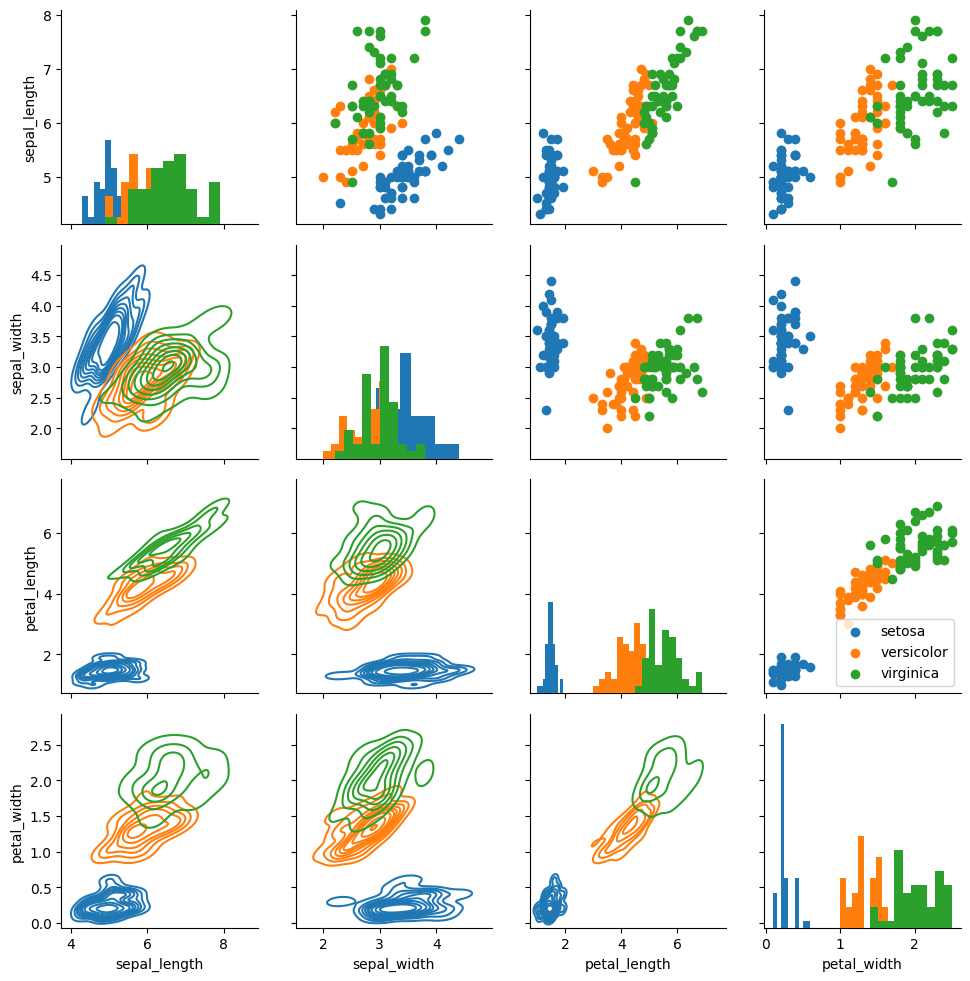

In [ ]:
# pair grid

iris_g = sns.PairGrid(iris, hue='species')
iris_g.map_diag(plt.hist) # using histogram in diagonal
iris_g.map_upper(plt.scatter)  # use scatter plot in upper
iris_g.map_lower(sns.kdeplot)   # use kde plot in lower

plt.legend()

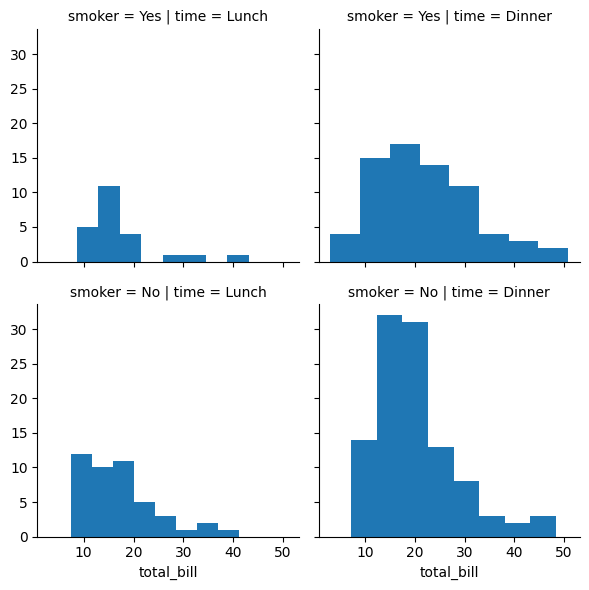

In [ ]:
# facet grid

tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.hist, 'total_bill', bins=8)

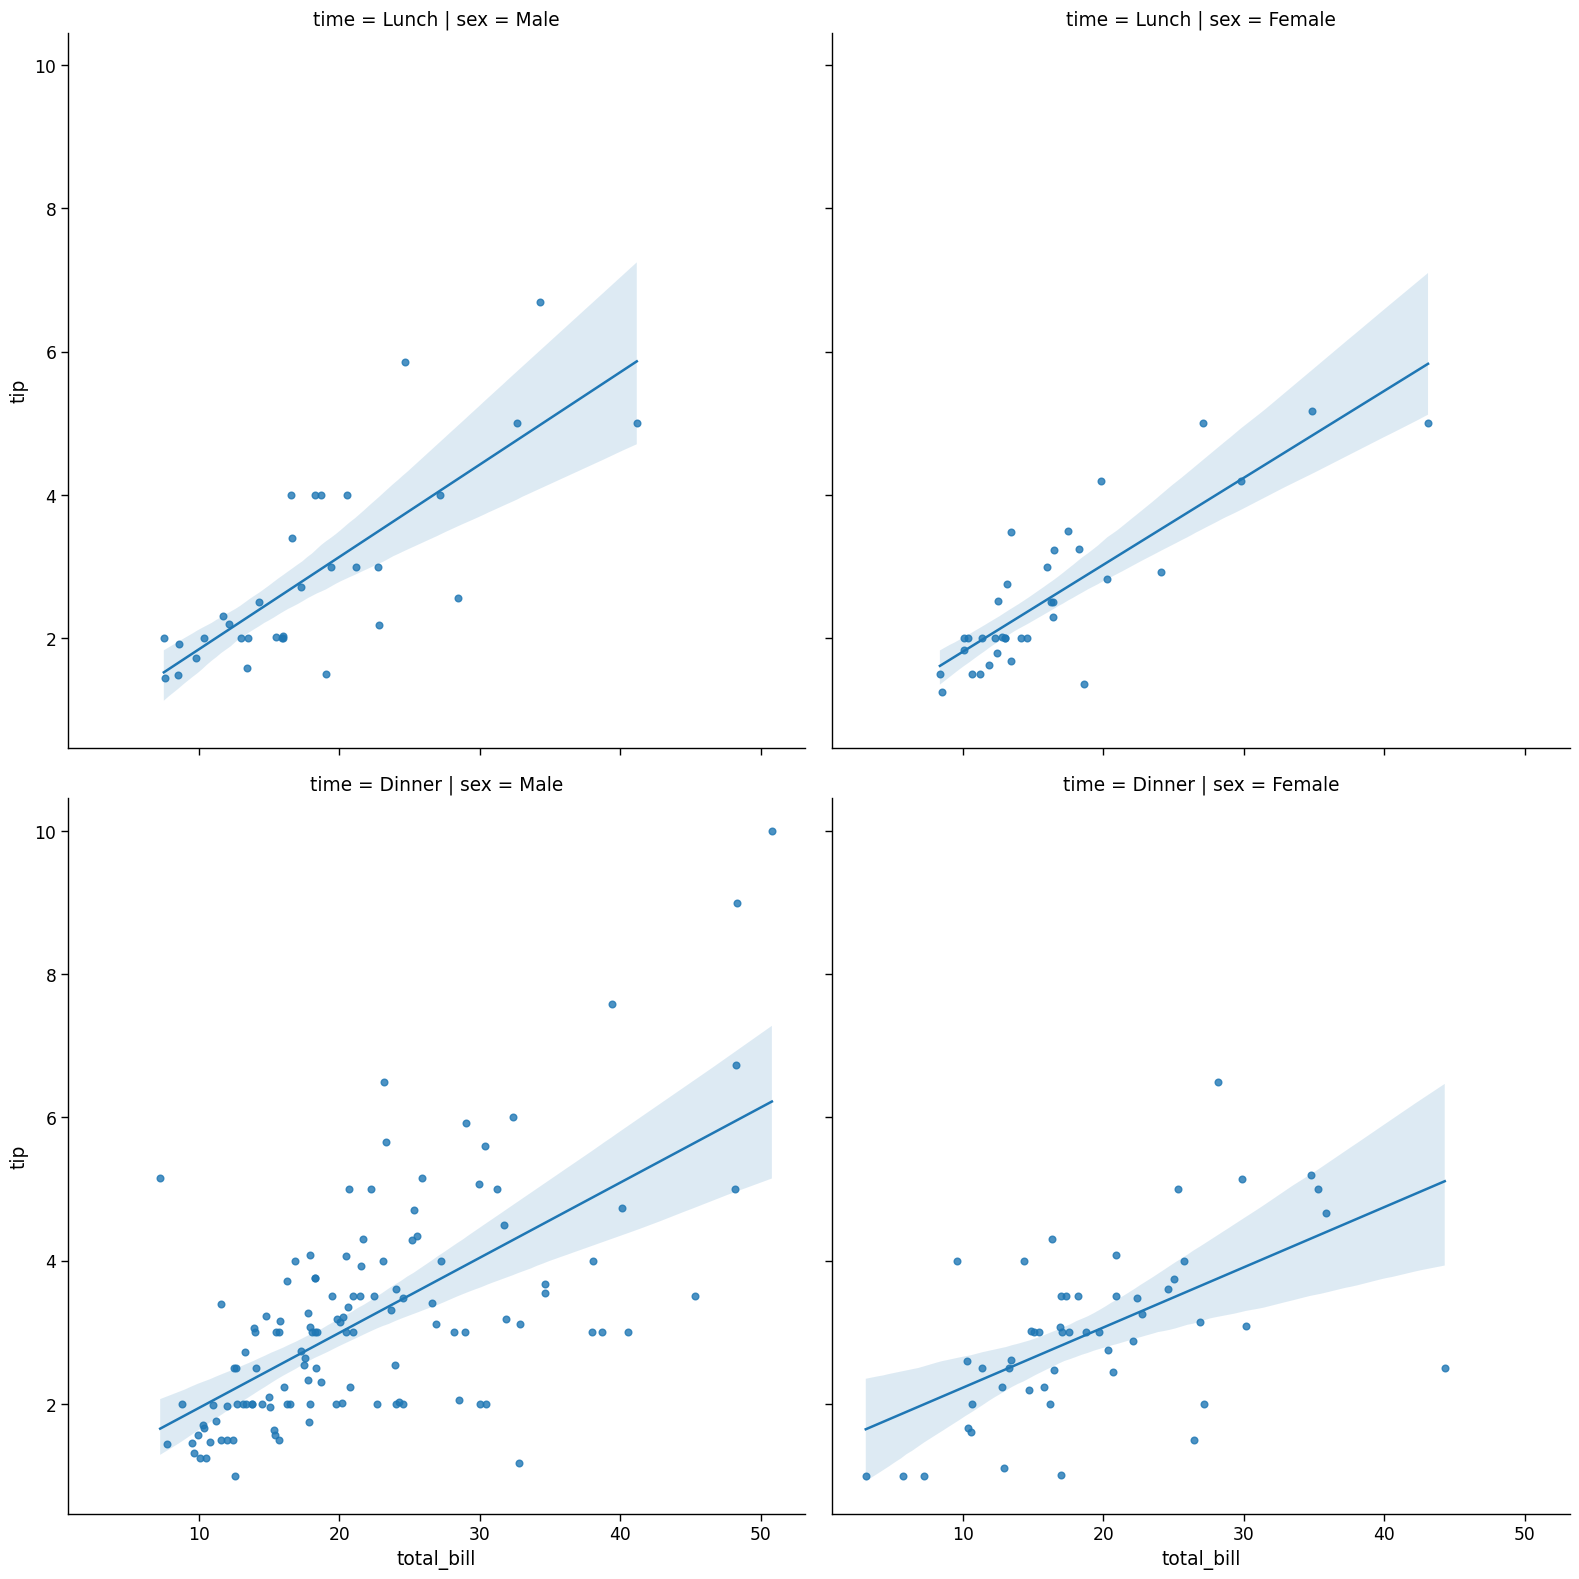

In [ ]:
# linear plot

sns.set_context('paper', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df, height=8)

## Sklearn


#### Linear Regression

In [ ]:
# the data

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3

In [ ]:
# model

model = LinearRegression(fit_intercept=True, n_jobs=1000, positive=False)

In [ ]:
# training

model.fit(X, y)

LinearRegression(n_jobs=1000)

In [ ]:
# predicting

pred = model.predict([[3,3]])
pred

array([12.])

In [ ]:
model.coef_ # checking the coeff

array([1., 2.])

In [ ]:
model.intercept_ # checking the intercept

3.0000000000000018

In [ ]:
# checking the r2 score

model.score(X, y)

1.0

#### Train test split

In [ ]:
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((90, 4), (60, 4))

In [ ]:
y_train.shape, y_test.shape

((90,), (60,))

#### Grid search cv

In [ ]:
# loading data
X, y = datasets.load_iris(as_frame=True, return_X_y=True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# the parameters of model
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [ ]:
# support vector machine model
model = svm.SVC()

In [ ]:
# setting grid search

clf = GridSearchCV(model, parameters)
clf.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
# the results

pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009327,0.003947,0.004896,0.002355,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.004128,0.000178,0.002868,0.000114,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,0.966667,0.966667,0.933333,1.0,0.966667,0.021082,4
2,0.003773,0.000246,0.002796,0.000107,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,3
3,0.004022,0.000086,0.002969,0.000069,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1


In [ ]:
# best estimators

clf.best_estimator_

SVC(C=1, kernel='linear')

In [ ]:
# best score

clf.best_score_

0.9800000000000001

In [ ]:
# best params

clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
clf.predict(X) # predict on best parameters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Randomized Search cv

Just like grid search. But it randomely choose each prameters from the list. Useful when there is a ton of parameters

In [ ]:
# loading data
X, y = datasets.load_iris(as_frame=True, return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [ ]:
# the parameters of model
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [ ]:
# support vector machine model
model = svm.SVC()

In [ ]:
# setting randomized search

clf = RandomizedSearchCV(model, parameters, n_jobs=3)
clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=SVC(), n_jobs=3,
                   param_distributions={'C': [1, 10],
                                        'kernel': ('linear', 'rbf')})

In [ ]:
# the results

pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007061,0.004826,0.013802,0.014375,linear,1,"{'kernel': 'linear', 'C': 1}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.017646,0.006369,0.013103,0.005660,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.966667,0.966667,0.966667,0.933333,1.0,0.966667,0.021082,4
2,0.019074,0.012471,0.011719,0.005251,linear,10,"{'kernel': 'linear', 'C': 10}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,3
3,0.008535,0.006665,0.010995,0.004066,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1


In [ ]:
# best estimators

clf.best_estimator_

SVC(C=1, kernel='linear')

#### Cross validation

In [ ]:
# the trained model

clf = svm.SVC(kernel='linear', C=1, random_state=42)
clf

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
# values in cross validation

scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
# mean of the scores

scores.mean()

0.9800000000000001

#### PCA

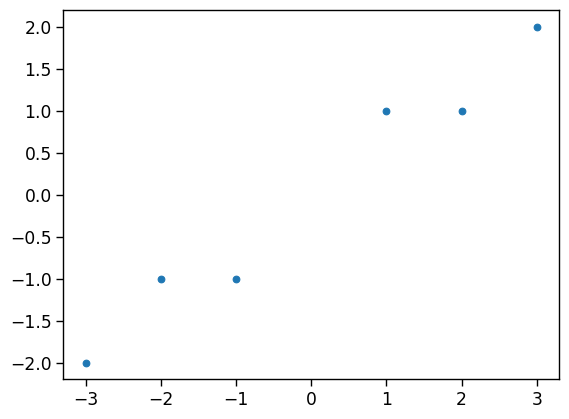

In [ ]:
# standardized data

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
# applying

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

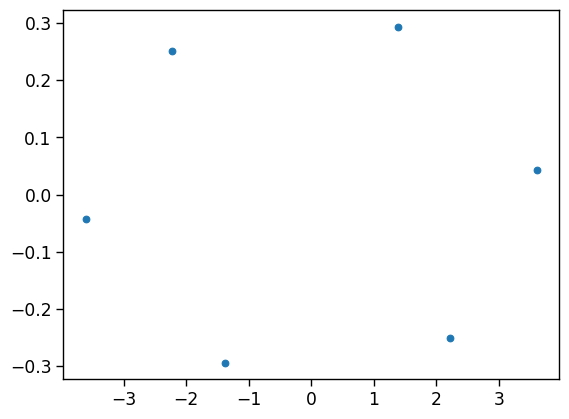

In [ ]:
# plotting

plt.scatter(X_pca[:, 0], X_pca[:, 1])

#### Kmeans

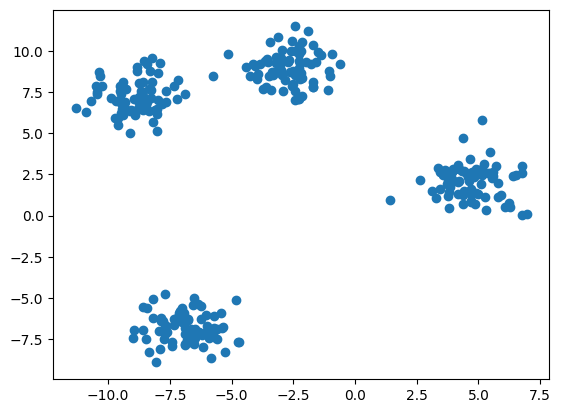

In [ ]:
# Generate data for clustering

data, _ = make_blobs(n_samples=300, centers=4, random_state=42)
plt.scatter(x=data[:, 0], y=data[:, 1])

In [ ]:
# creating model

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
# Get cluster assignments for each data point

labels = kmeans.labels_
labels

array([1, 1, 3, 2, 1, 2, 0, 2, 3, 0, 3, 0, 3, 3, 1, 3, 1, 0, 3, 3, 0, 3,
       2, 1, 3, 1, 1, 2, 2, 0, 3, 0, 1, 0, 1, 3, 1, 2, 1, 2, 0, 3, 1, 2,
       3, 3, 1, 0, 1, 0, 2, 1, 2, 3, 2, 0, 1, 0, 0, 3, 1, 0, 0, 3, 2, 2,
       2, 2, 2, 3, 2, 2, 1, 0, 3, 1, 2, 2, 3, 2, 3, 3, 1, 3, 2, 1, 1, 0,
       0, 0, 1, 3, 1, 3, 3, 1, 2, 3, 1, 1, 0, 0, 0, 3, 3, 3, 3, 3, 2, 1,
       0, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 2, 3, 1, 2, 1, 1, 3, 1, 2, 0, 3,
       3, 3, 3, 0, 0, 1, 3, 2, 3, 0, 2, 3, 0, 0, 0, 0, 2, 3, 3, 1, 0, 2,
       3, 0, 2, 1, 1, 0, 3, 1, 2, 1, 0, 1, 2, 3, 3, 3, 3, 3, 2, 0, 0, 2,
       2, 0, 0, 2, 1, 3, 1, 0, 0, 1, 2, 3, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0,
       0, 1, 3, 3, 2, 0, 3, 2, 2, 1, 2, 3, 3, 2, 2, 0, 1, 2, 1, 1, 3, 1,
       1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 3, 2, 0, 2, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 3, 1, 3, 0, 3, 1, 3,
       2, 0, 2, 0, 0, 3, 3, 2, 0, 0, 1, 1, 2, 3, 3, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 2, 3, 2, 0, 3, 1, 3, 0, 3, 1, 1], d

In [ ]:
# Get the coordinates of cluster centers

centers = kmeans.cluster_centers_

Text(0.5, 1.0, 'K-Means Clustering')

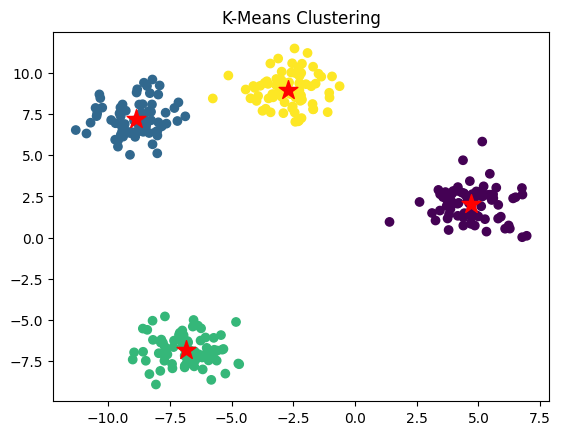

In [ ]:
# Plot the data points with colors indicating their clusters

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=200)
plt.title('K-Means Clustering')

#### Logistic regression

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

data.shape, target.shape

((150, 4), (150,))

In [ ]:
# Create a DataFrame for the Iris dataset

iris_df = pd.DataFrame(data, columns=iris.feature_names)
iris_df['target'] = target

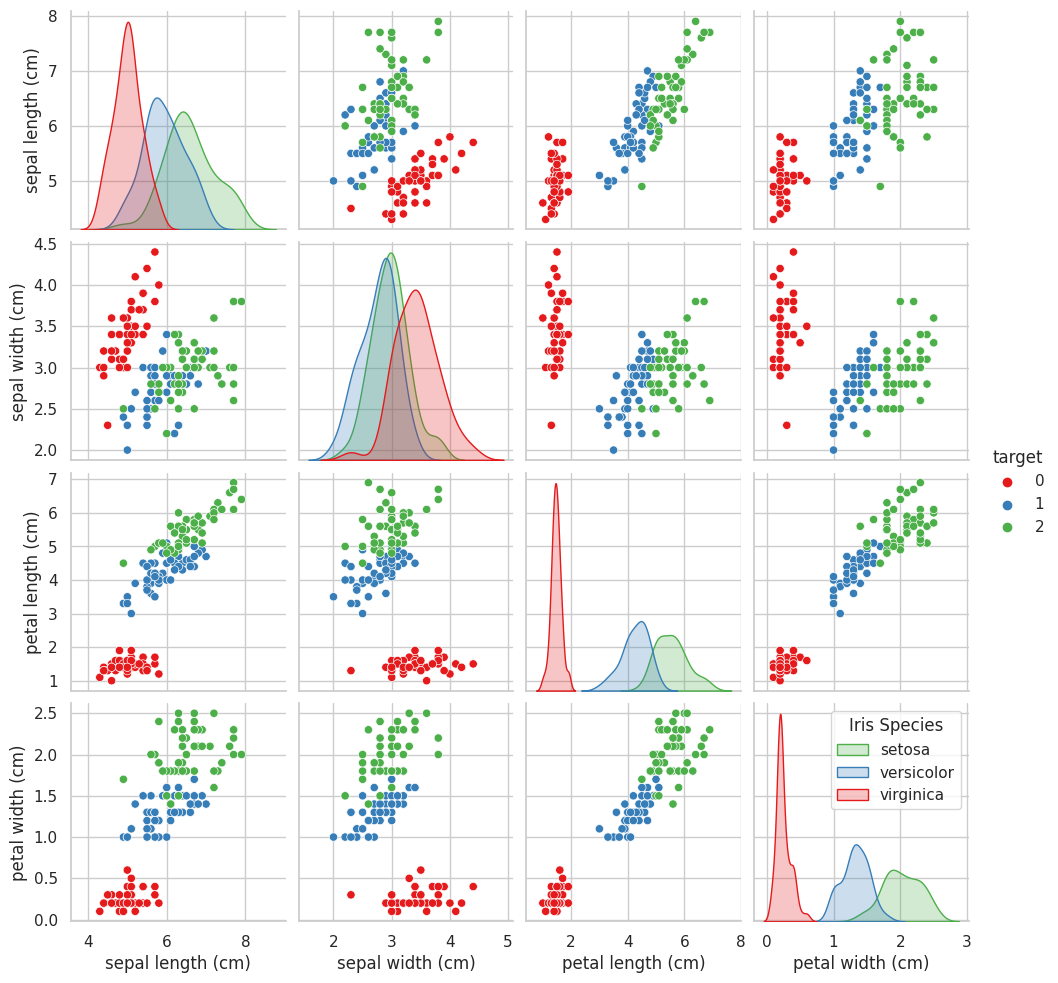

In [ ]:

# Create pair plots to visualize relationships between features
sns.pairplot(iris_df, hue="target", palette="Set1")

# Add legend
plt.legend(title="Iris Species", labels=target_names)


In [ ]:
 # splitting

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

X_train.shape, y_train.shape

((120, 4), (120,))

In [ ]:
# the model

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# predicting

y_pred = classifier.predict(X_test)

In [ ]:
# accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [ ]:
# the classification report

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## more

- Pytoch
- jax
- Spacy
- Tensorflow
- Keras
- NLTK
- scipy
- imblearn
- requests
- Beutiful Soup
- scrapy
- H2O
- Gradio
- Allen NLP
- Gensim
- cv2
- y_data_profiling
- re
- plotly
- PIL
- os
- wordcloud
- optuna
- featuretools
- pycaret
- Prophet
- Shap
- pyarrow
- pandas_profiling
- Dataprep
- Autoviz (with xlrd)
- sweetviz
- FLAML
- Ray Tune
- scikit-optimize
- hyperopt
- bokeh
- wordcloud
- Neptune
- tqdm
- tokenizers
- tesseract
- face_recognition
- faceswap
- deep face lab
- yolo v5
- dialogue flow
- xgboost
- fast ai
- openBBterminal
- easyocr
- jina ai
- mindsdb
- rasa nlp
- lightgbm
- onnx
- mlflow
- chatterbot
- horovod
- flair nlp
- qlib
- ludwing
- tpot
- pattern
- heystack
- grab
- helium

**Time series**
- Darts
- Nixtla
- TA-Lib
- Cesium-ML
- tsfresh
- Hctsa+Pyopy
- FATS
- Alphalens
- pyfolio
- Empyrical
- Masked time series